# Name: Khalil Alhamoud

# IOT & Computer Vision Task 4:

# Real Time Face Mask Detector.

In [1]:
# Mount The Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary libraries

In [2]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

# Data Preprocessing
![download.png](download.png)

In [3]:
data_path='/content/drive/My Drive/test/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [15]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            # Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            # Resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            # Appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            # If any exception rasied, the exception will be printed here. And pass to the next image

In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
new_target=np_utils.to_categorical(target)

In [7]:
# Save The Data To Numpy Array
np.save('/content/drive/My Drive/test/dataset/data',data)
np.save('/content/drive/My Drive/test/dataset/target',new_target)

# Model 

#  Convolutional Neural Network Architecture
![NN.png](cnn.png)

In [8]:
# Loading The Data array
data=np.load('/content/drive/My Drive/test/dataset/data.npy')
target=np.load('/content/drive/My Drive/test/dataset/target.npy')

In [9]:
#Building The Model


model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
# Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
# Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
# The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
# Split the data into training and testing
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

# Training The Model 

In [11]:
# Add a checkpoint to save the model
checkpoint = ModelCheckpoint('/content/drive/My Drive/test/dataset/model/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# Training
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7075 - accuracy: 0.4980

31/31 [==============================] - 16s 157ms/step - loss: 0.7075 - accuracy: 0.4980 - val_loss: 0.6473 - val_accuracy: 0.5766
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.6646

31/31 [==============================] - 2s 79ms/step - loss: 0.6262 - accuracy: 0.6646 - val_loss: 0.4914 - val_accuracy: 0.8185
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.4868 - accuracy: 0.7667

31/31 [==============================] - 2s 82ms/step - loss: 0.4868 - accuracy: 0.7667 - val_loss: 0.4338 - val_accuracy: 0.8347
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.3930 - accuracy: 0.8192

31/31 [==============================] - 2s 70ms/step - loss: 0.3930 - accuracy: 0.8192 - val_loss: 0.4185 - val_accuracy: 0.8185
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.3454 - accuracy: 0.8505

31/31 [==============================] - 2s 72ms/step - loss: 0.3454 - accuracy: 0.8505 - val_loss: 0.2650 - val_accuracy: 0.9113
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.2407 - accuracy: 0.9121

31/31 [==============================] - 3s 92ms/step - loss: 0.2407 - accuracy: 0.9121 - val_loss: 0.2319 - val_accuracy: 0.9113
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.2029 - accuracy: 0.9242

31/31 [==============================] - 4s 120ms/step - loss: 0.2029 - accuracy: 0.9242 - val_loss: 0.1710 - val_accuracy: 0.9355
Epoch 8/20
31/31 [==============================] - 1s 40ms/step - loss: 0.1462 - accuracy: 0.9515 - val_loss: 0.2087 - val_accuracy: 0.9234
Epoch 9/20
31/31 [==============================] - 1s 35ms/step - loss: 0.1208 - accuracy: 0.9586 - val_loss: 0.1979 - val_accuracy: 0.9274
Epoch 10/20
31/31 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9758

31/31 [==============================] - 2s 79ms/step - loss: 0.0845 - accuracy: 0.9758 - val_loss: 0.1188 - val_accuracy: 0.9516
Epoch 11/20
31/31 [==============================] - 1s 38ms/step - loss: 0.1048 - accuracy: 0.9596 - val_loss: 0.1488 - val_accuracy: 0.9476
Epoch 12/20
31/31 [==============================] - 1s 38ms/step - loss: 0.0706 - accuracy: 0.9737 - val_loss: 0.1276 - val_accuracy: 0.9597
Epoch 13/20
31/31 [==============================] - 1s 36ms/step - loss: 0.0927 - accuracy: 0.9626 - val_loss: 0.1323 - val_accuracy: 0.9476
Epoch 14/20
31/31 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9818

31/31 [==============================] - 3s 105ms/step - loss: 0.0525 - accuracy: 0.9818 - val_loss: 0.1152 - val_accuracy: 0.9516
Epoch 15/20
31/31 [==============================] - 1s 41ms/step - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.1280 - val_accuracy: 0.9597
Epoch 16/20
31/31 [==============================] - 1s 40ms/step - loss: 0.0369 - accuracy: 0.9838 - val_loss: 0.1161 - val_accuracy: 0.9516
Epoch 17/20
31/31 [==============================] - 1s 37ms/step - loss: 0.0225 - accuracy: 0.9949 - val_loss: 0.1415 - val_accuracy: 0.9597
Epoch 18/20
31/31 [==============================] - 1s 39ms/step - loss: 0.0307 - accuracy: 0.9838 - val_loss: 0.1200 - val_accuracy: 0.9597
Epoch 19/20
31/31 [==============================] - 1s 37ms/step - loss: 0.0295 - accuracy: 0.9879 - val_loss: 0.1314 - val_accuracy: 0.9556
Epoch 20/20
31/31 [==============================] - 1s 35ms/step - loss: 0.0218 - accuracy: 0.9960 - val_loss: 0.1428 - val_accuracy: 0.9637


In [12]:
model.save('/content/drive/My Drive/test/dataset/model1/mask_detector.model')

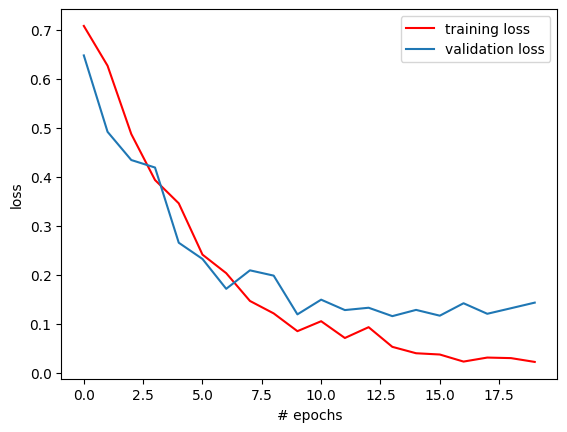

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

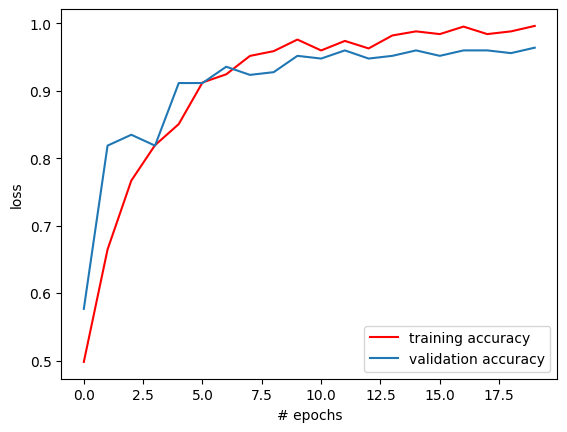

In [14]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# # Detecting Faces with and without masks

![detecting.png](det.png)

In [4]:
from keras.models import load_model
import cv2
import numpy as np

In [19]:
# Load The Trained Model
model = load_model('model/model-014.model')

# Load the Classifier
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [20]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Extract the face ROI
    faces=face_clsfr.detectMultiScale(gray,1.3,5)

    for x,y,w,h in faces:

        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        
        # Predict the mask using the face mask detection model
        result=model.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        
        # Determine the class color and add the label to the bounding box
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)


    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)

    if(key==27):
        break

cv2.destroyAllWindows()
source.release()

1/1 [==============================] - 0s 107ms/step
